# 1. 모듈 불러오기

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet
# conda install -c conda-forge fbprophet
from datetime import date
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')

# 2. 데이터 탐색 - Kospi 200

## 2-0) Kospi 200 데이터 불러오기

In [442]:
stockfile = 'kospi200.csv'
#stockfile = 'samsung.csv'
#stockfile = 'skhynix.csv'
#stockfile = 'sment.csv'
#stockfile = 'cjenm.csv'

stockdata = pd.read_csv(stockfile, thousands=',')
stockdata = stockdata[::-1]
stockdata['Date'] = pd.to_datetime(stockdata['Date'])
stockdata.drop(['Vol.', 'Change %'], axis=1, inplace=True)
stockdata.set_index(['Date'], inplace=True)

sx = stockdata.drop(['Price'], axis=1)
sy = stockdata['Price']

## 2-1) 기초 통계량 확인

In [443]:
stockdata.describe()


,Price,Open,High,Low
count,1231.00000,1231.000000,1231.000000,1231.000000
mean,324.70147,324.892908,326.852803,322.581982
std,54.70136,54.767102,55.059327,54.445067
min,199.28000,200.800000,206.660000,196.270000
25%,281.80500,281.760000,283.680000,279.960000
50%,312.84000,313.090000,314.770000,310.570000
75%,361.87500,362.880000,364.485000,360.295000
max,440.40000,440.780000,449.040000,438.750000


## 2-2) 결측치 확인

In [444]:
stockdata.isnull().sum()

Price    0
Open     0
High     0
Low      0
dtype: int64

## 2-3) 다중공선성 확인 - Kospi 200

In [445]:
sx.corr()

,Open,High,Low
Open,1.000000,0.999365,0.999181
High,0.999365,1.000000,0.999041
Low,0.999181,0.999041,1.000000


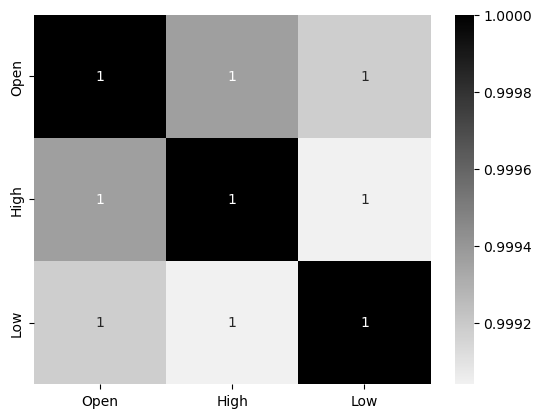

In [446]:
cmap = sns.light_palette(color='black', as_cmap=True)
sns.heatmap(sx.corr(), annot=True, cmap=cmap)
plt.show()

In [447]:
kospi200 = pd.read_csv('kospi200.csv', thousands=',')
samsung= pd.read_csv('samsung.csv', thousands=',')
skhynix= pd.read_csv('SKhynix.csv', thousands=',')
sment= pd.read_csv('sment.csv', thousands=',')
cjenm= pd.read_csv('cjenm.csv', thousands=',')

# 'Date' column 날짜 형식으로 바꾸기
kospi200['Date'], samsung['Date'], skhynix['Date'], sment['Date'], cjenm['Date'] = \
    pd.to_datetime(kospi200['Date']), pd.to_datetime(samsung['Date']), pd.to_datetime(skhynix['Date']), \
    pd.to_datetime(sment['Date']), pd.to_datetime(cjenm['Date'])

# data 합치기 - merge 이용
stock1 = pd.merge(kospi200, samsung, left_on='Date', right_on='Date', how='outer')
stock1.drop(['Open_x', 'High_x', 'Low_x', 'Vol._x', 'Change %_x', 'Open_y', 'High_y', 'Low_y', 'Vol._y', 'Change %_y'],
           axis=1, inplace=True)
stock2 = pd.merge(skhynix, sment, left_on='Date', right_on='Date', how='outer')
stock2.drop(['Open_x', 'High_x', 'Low_x', 'Vol._x', 'Change %_x', 'Open_y', 'High_y', 'Low_y', 'Vol._y', 'Change %_y'],
           axis=1, inplace=True)
stock3 = pd.merge(stock1, stock2, left_on='Date', right_on='Date', how='outer')
stock = pd.merge(stock3, cjenm, left_on='Date', right_on='Date', how='outer')
stock.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
stock.columns = ['Date', 'kospi200', 'samsung', 'skhynix', 'sment', 'cjenm']

stock.sort_values(by='Date', inplace=True)
stock.set_index('Date', inplace=True)
stock

,kospi200,samsung,skhynix,sment,cjenm
Date,,,,,
2017-10-22,NaN,NaN,81200.0,30650.0,NaN
2017-10-23,329.45,54300.0,84700.0,31250.0,191100.0
2017-10-24,328.96,54040.0,81800.0,30400.0,194000.0
2017-10-25,329.31,53900.0,81700.0,30400.0,200000.0
2017-10-26,326.99,52400.0,78700.0,32900.0,196200.0
...,...,...,...,...,...
2022-10-17,289.57,56600.0,95200.0,68700.0,77600.0
2022-10-18,293.59,56500.0,95800.0,69200.0,79700.0
2022-10-19,291.29,55800.0,92900.0,67400.0,78800.0


# 4. 데이터 전처리

In [448]:
scaler = MinMaxScaler()
stock_scaled= scaler.fit_transform(stock)
stock_scaled = pd.DataFrame(stock_scaled, columns=stock.columns, index=list(stock.index.values))
stock_scaled

,kospi200,samsung,skhynix,sment,cjenm
2017-10-22,NaN,NaN,0.258811,0.201590,NaN
2017-10-23,0.539856,0.314659,0.297357,0.210260,0.552162
2017-10-24,0.537823,0.309804,0.265419,0.197977,0.565789
2017-10-25,0.539275,0.307190,0.264317,0.197977,0.593985
2017-10-26,0.529653,0.279178,0.231278,0.234104,0.576128
...,...,...,...,...,...
2022-10-17,0.374461,0.357610,0.412996,0.751445,0.018797
2022-10-18,0.391133,0.355742,0.419604,0.758671,0.028665
2022-10-19,0.381594,0.342670,0.387665,0.732659,0.024436
2022-10-20,0.370479,0.337068,0.357930,0.702312,0.028665


# 5. Prophet 예측

In [449]:
def prophet(stockname):
    pricedf = pd.DataFrame({"ds": stock_scaled.index, "y": stock_scaled[stockname]})
    model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    model.fit(pricedf)
    future = model.make_future_dataframe(periods=10, freq='B')
    # freq='B' : 평일만 예측
    forecast = model.predict(future)
    model.plot(forecast)
    output = forecast[['ds', 'yhat']]
    output.columns = ['ds', stockname]
    return output

Initial log joint probability = -44.718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2765.21     0.0300967       1317.29           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2870.7     0.0148741       1049.87      0.4381           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2891.06     0.0140318       532.752           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2899.19    0.00178978       90.4867           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2906.26    0.00137627       132.027      0.4776      0.4776      590   
    Iter      log prob        ||dx||      ||grad||       alpha   

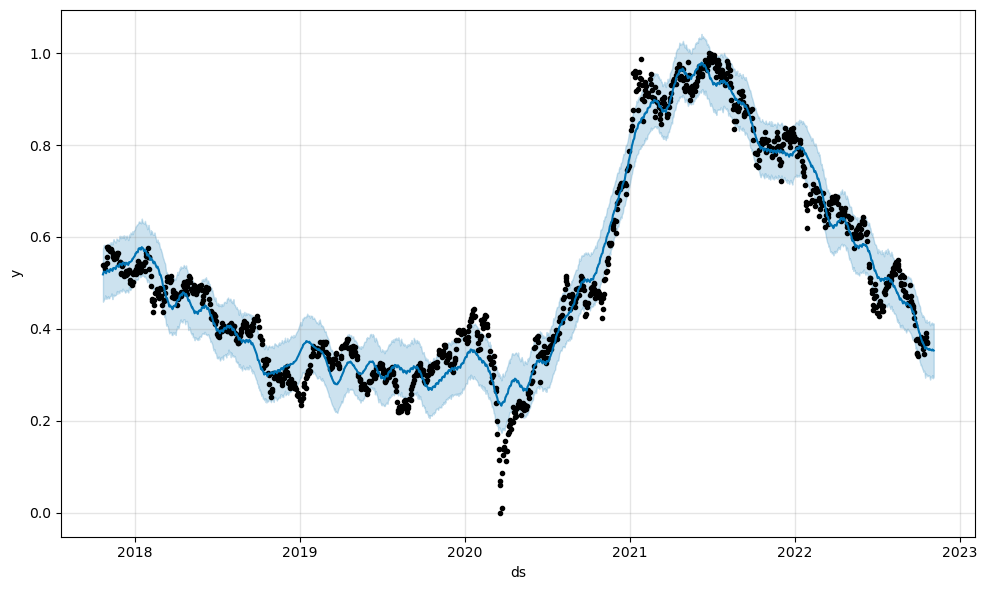

In [450]:
pr_kospi200 = prophet('kospi200')

Initial log joint probability = -48.2704
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3160.17     0.0172918       333.596           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3252.43     0.0212391       1121.22           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       3266.74   0.000931725       336.397   3.635e-06       0.001      331  LS failed, Hessian reset 
     299       3275.68    0.00388451       328.806           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328          3277   0.000183615       302.327   8.247e-07       0.001      490  LS failed, Hessian reset 
     399       3279.23     0.0265098       159.901           1           1      582   
    Iter      log pro

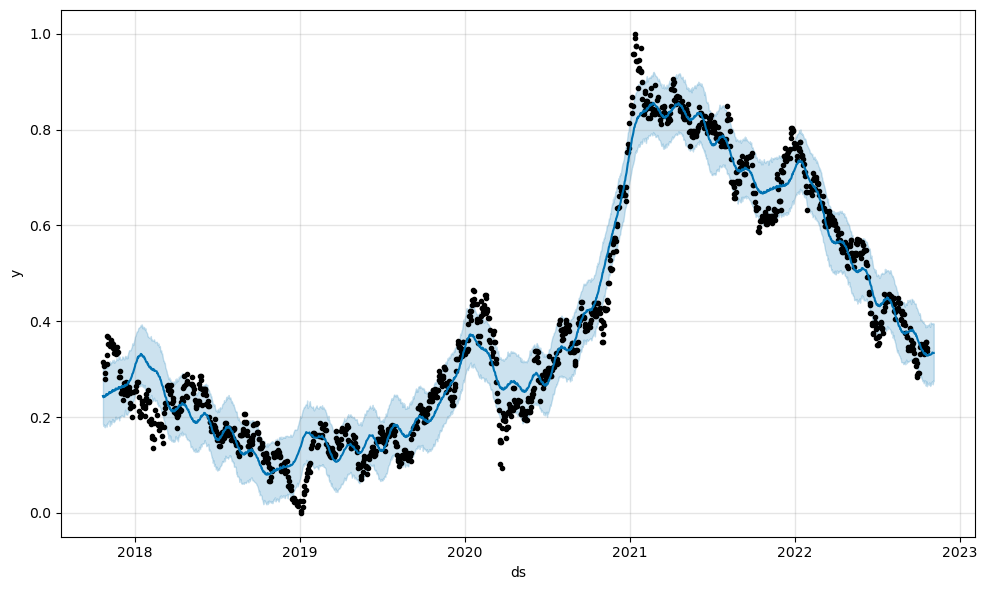

In [451]:
pr_samsung = prophet('samsung')

Initial log joint probability = -37.7726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2704.31      0.222981       461.592           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2769.53     0.0101743       155.842           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2793.81    0.00552574       450.026      0.1246      0.1246      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2805.74     0.0112228        168.06           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2815.24    0.00735725       167.136           1           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

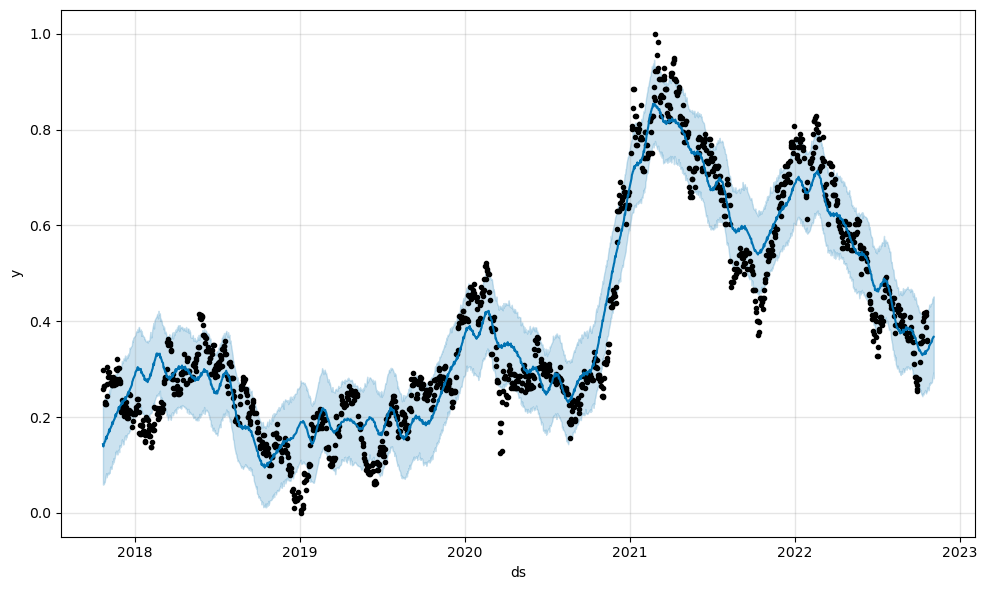

In [452]:
pr_skhynix = prophet('skhynix')

Initial log joint probability = -28.8184
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2880.11     0.0260934       664.404        0.99       0.099      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2962.95    0.00841548       499.973      0.4167      0.4167      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2980.43    0.00477419       255.316      0.3065      0.3065      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302       2980.52   0.000422122       291.833   4.432e-06       0.001      393  LS failed, Hessian reset 
     399       2992.75    0.00916194       219.637      0.4893      0.4893      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       2997.16   0.000766846    

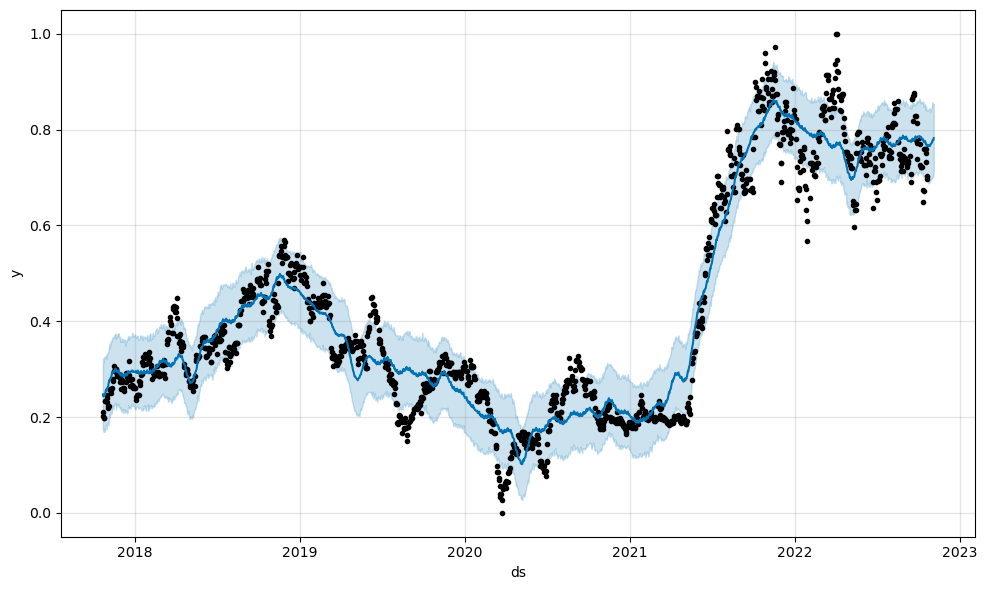

In [453]:
pr_sment = prophet('sment')

Initial log joint probability = -28.3454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3021.56     0.0319334       901.734           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       3070.21   0.000426595       271.829    3.76e-06       0.001      271  LS failed, Hessian reset 
     199       3071.88    0.00464556       196.997           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3098.52   0.000930949        551.25     0.02545           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       3100.63   0.000164474        208.73   1.209e-06       0.001      457  LS failed, Hessian reset 
     399       3104.25   0.000252553       166.767           1           1      566   
    Iter      log pro

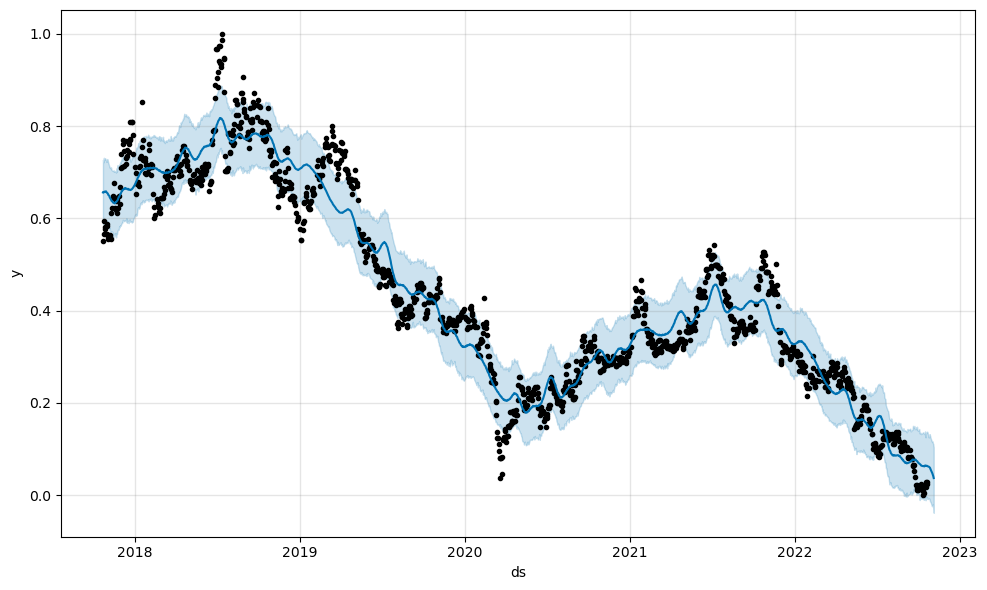

In [454]:
pr_cjenm = prophet('cjenm')

In [455]:
# data 합치기 - merge 이용
pr1 = pd.merge(pr_kospi200, pr_samsung, left_on='ds', right_on='ds', how='outer')
pr2 = pd.merge(pr_skhynix, pr_sment, left_on='ds', right_on='ds', how='outer')
pr3 = pd.merge(pr1, pr2, left_on='ds', right_on='ds', how='outer')
pr = pd.merge(pr3, pr_cjenm, left_on='ds', right_on='ds', how='outer')
pr.columns = ['Date', 'kospi200', 'samsung', 'skhynix', 'sment', 'cjenm']

pr.sort_values(by='Date', inplace=True)
pr.set_index('Date', inplace=True)
pr.tail()

,kospi200,samsung,skhynix,sment,cjenm
Date,,,,,
2022-10-31,0.353109,0.332134,0.357388,0.773014,0.049804
2022-11-01,0.355289,0.334717,0.363251,0.776886,0.047276
2022-11-02,0.353692,0.333770,0.364187,0.777957,0.044500
2022-11-03,0.353729,0.333541,0.366824,0.777736,0.041324
2022-11-04,0.353050,0.333766,0.367547,0.782334,0.037098


In [456]:
# 전처리 되돌리기
pr_unscaled= scaler.inverse_transform(pr)
pr_unscaled = pd.DataFrame(pr_unscaled, columns=pr.columns, index=list(pr.index.values))
pr_unscaled.tail()

,kospi200,samsung,skhynix,sment,cjenm
2022-10-31,284.421648,55235.793921,90150.837958,70192.603393,84198.274557
2022-11-01,284.947312,55374.084993,90683.216504,70460.531688,83660.244623
2022-11-02,284.562274,55323.405415,90768.171591,70534.658756,83069.694868
2022-11-03,284.571081,55311.098135,91007.610518,70519.330165,82393.754017
2022-11-04,284.407458,55323.148426,91073.223704,70837.535933,81494.407485


In [457]:
# 수익률 계산 함수
def getRatio(stockname):
    for i in range(1, len(mydate)):
        x1 = forecast[stockname][mydate[i-1]]
        x2 = forecast[stockname][mydate[i]]
        yield_forecast = (x2-x1)/x1
        forecast[stockname+'_ratio'][mydate[i]] = yield_forecast

In [458]:
mydate = ['2022-10-26','2022-10-27', '2022-10-28', '2022-10-31']

forecast = pd.DataFrame ({
    'kospi200': pr_unscaled.kospi200[mydate],
    'kospi200_ratio':[0,0,0,0],
    'samsung': pr_unscaled.samsung[mydate],
    'samsung_ratio':[0,0,0,0],
    'skhynix': pr_unscaled.skhynix[mydate],
    'skhynix_ratio':[0,0,0,0],
    'sment': pr_unscaled.sment[mydate],
    'sment_ratio':[0,0,0,0],
    'cjenm': pr_unscaled.cjenm[mydate],
    'cjenm_ratio':[0,0,0,0],
    },
    index=mydate
)

for cols in pr_unscaled.columns:
    getRatio(cols)
    
forecast


,kospi200,kospi200_ratio,samsung,samsung_ratio,skhynix,skhynix_ratio,sment,sment_ratio,cjenm,cjenm_ratio
2022-10-26,284.918275,0.000000,55132.758990,0.000000,89451.580839,0.000000,69825.579751,0.000000,86416.193130,0.000000
2022-10-27,284.933148,0.000052,55116.512969,-0.000295,89696.749933,0.002741,69723.500071,-0.001462,86106.293667,-0.003586
2022-10-28,284.782164,-0.000530,55127.671642,0.000202,89771.110274,0.000829,69968.383724,0.003512,85545.980054,-0.006507
2022-10-31,284.421648,-0.001266,55235.793921,0.001961,90150.837958,0.004230,70192.603393,0.003205,84198.274557,-0.015754
